#**LSTM model training and testing**



###Drive preparation section

Mounting google drive to access data on drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Assigning variables to file path

In [2]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab_Notebooks/Dissertation' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['Data', 'Code', 'Writeups', 'Tableau data']


In [3]:
DATA_PATH_AFTER_MYDRIVE = 'Colab_Notebooks/Dissertation/Data' 
DATA_PATH = os.path.join('drive', 'My Drive', DATA_PATH_AFTER_MYDRIVE)
print(os.listdir(DATA_PATH))

['Bengaluru_air_met_df.csv', 'Delhi_air_met_df.csv', 'Hyderabad_air_met_df.csv', 'Jaipur_air_met_df.csv', 'Mumbai_air_met_df.csv', 'Saved_Models']


Check the specifications of allocated CPU.

In [4]:
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.00GHz


Check the specifications of allocated GPU.

In [5]:
!nvidia-smi -q


==============NVSMI LOG==============

Timestamp                                 : Fri Sep 30 03:44:47 2022
Driver Version                            : 460.32.03
CUDA Version                              : 11.2

Attached GPUs                             : 1
GPU 00000000:00:04.0
    Product Name                          : Tesla T4
    Product Brand                         : Tesla
    Display Mode                          : Enabled
    Display Active                        : Disabled
    Persistence Mode                      : Disabled
    MIG Mode
        Current                           : N/A
        Pending                           : N/A
    Accounting Mode                       : Disabled
    Accounting Mode Buffer Size           : 4000
    Driver Model
        Current                           : N/A
        Pending                           : N/A
    Serial Number                         : 1561220006434
    GPU UUID                              : GPU-4f2ded9c-7f61-a74e-9a32-e2d81

Check the specifications of allocated memory.

In [4]:
!free -h --si | awk  '/Mem:/{print $2}'

13G


*Coding reference for above executions:*

https://medium.com/analytics-vidhya/the-google-colab-system-specification-check-69d159597417

###Packages installation section

Installation of tensorflow package for algorithms.

In [4]:
! pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Installation of PerMetrics package for Performance metrics of models

In [5]:
! pip install permetrics==1.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Installation of Keras Tuner package for hyperparameter tuning of models.

In [6]:
! pip install keras-tuner -q

     |████████████████████████████████| 135 kB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 47.0 MB/s 


Installation of tensorflow addons package for AdamW optimizer.

In [7]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.1 MB/s 


###Time series data preparation section

Import of necessary libraries.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras import layers
from math import sqrt
from sklearn import metrics
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from permetrics.regression import RegressionMetric
import keras_tuner
import tensorflow_addons as tfa
import time
import pickle

Check the version of Python.

In [12]:
!python --version

Python 3.7.14


Check version fo tensorflow package being used.

In [11]:
tf.version.VERSION

'2.8.2'

Check version of Keras package being used.

In [9]:
!pip show keras

Name: keras
Version: 2.8.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: tensorflow, keras-vis


Check version of pandas package being used.

In [13]:
!pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, python-dateutil, pytz
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc, prophet, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fastai, datascience, cufflinks, cmdstanpy, arviz, altair


Check version of numpy package being used.

In [14]:
!pip show numpy

Name: numpy
Version: 1.21.6
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, xarray-einstats, wordcloud, torchvision, torchtext, tifffile, thinc, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-datasets, tensorboard, tables, statsmodels, spacy, sklearn-pandas, seaborn, scs, scipy, scikit-learn, scikit-image, resampy, qudida, qdldl, PyWavelets, python-louvain, pystan, pysndfile, pymc, pyerfa, pyemd, pycocotools, pyarrow, prophet, plotnine, permetrics, patsy, pandas, osqp, opt-einsum, opencv-python, opencv-python-headless, opencv-contrib-python, numexpr, numba, nibabel, netCDF4, moviepy, mlxtend, mizani, missingno, matplotlib, matplotlib-venn, lightgbm, librosa, keras-tuner, Keras-Preprocessing, kapre, jpeg4py, jaxlib, jax, imgaug, imbalanced-learn,

Check version of matplotlib package being used.

In [15]:
!pip show matplotlib

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: cycler, numpy, kiwisolver, pyparsing, python-dateutil
Required-by: yellowbrick, wordcloud, seaborn, scikit-image, pycocotools, prophet, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fastai, descartes, datascience, daft, arviz


Check version of sklearn package being used.

In [17]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: joblib, numpy, threadpoolctl, scipy
Required-by: yellowbrick, sklearn-pandas, qudida, mlxtend, lightgbm, librosa, imbalanced-learn, fastai


Seed random generators for consistent results over different runs of the code script.

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

Load data preprocessed data set of air pollution and meteorological data for Delhi city into a pandas dataframe.

In [10]:
Delhi_air_met_df = pd.read_csv(os.path.join(DATA_PATH,'Delhi_air_met_df.csv'))

Have a glance of the data frame.

In [11]:
Delhi_air_met_df.head()

,Unnamed: 0,Datetime,sunHour,uvIndex.1,DewPointC,HeatIndexC,cloudcover,humidity,precipMM,pressure,...,windspeedKmph,CO,NH3,NO,NO2,NOx,O3,PM10,SO2,PM2.5
0,0,2015-01-01 01:00:00,8.7,1,2,12,15,51,0.0,1016,...,9,3.716,40.606,94.906,41.784,187.662,65.004,935.1800,3.226,368.222
1,1,2015-01-01 02:00:00,8.7,1,3,13,15,51,0.0,1016,...,8,5.436,21.774,57.126,43.456,176.830,64.702,945.6325,3.690,569.736
2,2,2015-01-01 03:00:00,8.7,1,3,13,15,50,0.0,1016,...,6,35.202,38.046,132.464,41.190,141.022,16.852,956.0850,2.100,558.244
3,3,2015-01-01 04:00:00,8.7,1,3,13,13,48,0.0,1017,...,7,34.506,21.836,84.782,39.552,102.844,27.350,966.5375,3.716,283.648
4,4,2015-01-01 05:00:00,8.7,1,3,14,11,46,0.0,1018,...,9,29.116,24.034,60.236,37.414,80.124,10.000,976.9900,7.100,290.254


*It can seen that an extra index column "Unnamed:0" was formed while exporting the data frame to CSV file. So, it must be removed.*

Delete unnecessary columns.

In [12]:
Delhi_air_met_df.drop(columns=['Unnamed: 0', 'Datetime'], inplace=True)

*Coding reference for above executions:*

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

Splitting data into train and test sets without shuffeling, to preserve the chronology of the time series data.

In [13]:
train_size = int(len(Delhi_air_met_df) * 0.8)
test_size = len(Delhi_air_met_df) - train_size
train_df, test_df = Delhi_air_met_df.iloc[0:train_size], Delhi_air_met_df.iloc[train_size:len(Delhi_air_met_df)]

Check the dimensions of training and test datasets.

In [14]:
print('training dataset size:', train_df.shape, "|", 'test dataset size:', test_df.shape)

training dataset size: (35058, 21) | test dataset size: (8765, 21)


*Coding reference for above executions:*

https://curiousily.com/posts/demand-prediction-with-lstms-using-tensorflow-2-and-keras-in-python/

https://www.youtube.com/watch?v=xaIA83x5Icg

Creation of normalization object.

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))

Fitting only training data to normalization object.

In [16]:
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)

Scaling test data with normalization object that has been trained with training data only.

In [17]:
test_df = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)

Defining a function to create Rolling Window of time series data.

In [18]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

Assigning variable to time period/frame of past timestamps, which the models would take as input to predict target value at future timestamp(S).

In [19]:
time_steps = 24

Obtraining variables and targets for training and test data sets in Rolling Window format unsing above defined function. 

Note that the variables that will be input for the algorithms will be in 3 dimensional array, with a shape as 

(no. of observations, time steps of past, number of variable).

In [20]:
X_train, y_train = create_dataset(train_df, train_df['PM2.5'], time_steps)
X_test, y_test = create_dataset(test_df, test_df['PM2.5'], time_steps)

Check the dimensions of features and targets for training and test sets.

In [21]:
print("Dimensions of taining set features:", X_train.shape)
print("Dimensions of taining set target:", y_train.shape)
print("Dimensions of test set features:", X_test.shape)
print("Dimensions of test set target:", y_test.shape)

Dimensions of taining set features: (35034, 24, 21)
Dimensions of taining set target: (35034,)
Dimensions of test set features: (8741, 24, 21)
Dimensions of test set target: (8741,)


*Coding reference for above executions:*

https://curiousily.com/posts/demand-prediction-with-lstms-using-tensorflow-2-and-keras-in-python/

https://www.youtube.com/watch?v=xaIA83x5Icg

###Model trainig, testing and tuning section

Creation of early stopping object to stop trainig after no decrease in loss function value after consecutive number of steps assigned to patience argument.

In [ ]:
early_stopping_monitor = EarlyStopping(patience=10)

*Coding reference for above executions:*

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

Creation of baseline model.

In [ ]:
LSTM_model0 = keras.Sequential()
LSTM_model0.add(layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model0.add(layers.Dense(1))
LSTM_model0.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(0.01))

*Coding reference for above executions:*

https://keras.io/api/layers/recurrent_layers/lstm/

https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

Fitting baseline model to training data.

In [ ]:
LSTM0_history = LSTM_model0.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 11s 19ms/step - loss: 0.0385 - val_loss: 0.0145
Epoch 2/100
479/479 [==============================] - 9s 18ms/step - loss: 0.0323 - val_loss: 0.0135
Epoch 3/100
479/479 [==============================] - 9s 18ms/step - loss: 0.0321 - val_loss: 0.0123
Epoch 4/100
479/479 [==============================] - 10s 21ms/step - loss: 0.0314 - val_loss: 0.0162
Epoch 5/100
479/479 [==============================] - 9s 19ms/step - loss: 0.0312 - val_loss: 0.0145
Epoch 6/100
479/479 [==============================] - 9s 19ms/step - loss: 0.0309 - val_loss: 0.0113
Epoch 7/100
479/479 [==============================] - 9s 18ms/step - loss: 0.0308 - val_loss: 0.0152
Epoch 8/100
479/479 [==============================] - 9s 19ms/step - loss: 0.0306 - val_loss: 0.0131
Epoch 9/100
479/479 [==============================] - 10s 20ms/step - loss: 0.0305 - val_loss: 0.0123
Epoch 10/100
479/479 [==============================] - 9s 19ms/step - loss: 0.

Plotting loss curves of trainig and validation sets during the training of the baseline model.

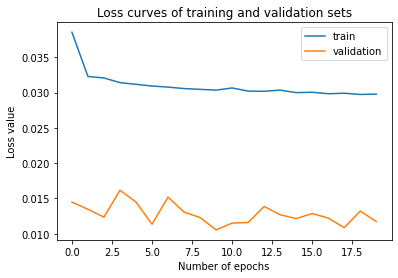

In [ ]:
plt.plot(LSTM0_history.history['loss'], label='train')
plt.plot(LSTM0_history.history['val_loss'], label='validation')
plt.legend()
plt.title('Loss curves of training and validation sets')
plt.xlabel('Number of epochs')
plt.ylabel('Loss value')
plt.show()

Prediction of target values for test data set variables.

In [ ]:
y_pred0 = LSTM_model0.predict(X_test)

Reshaping the array of actual target values of test data set and then applying inverse transformation to get them to original scale before comparison with prediction values.

In [ ]:
y_test_reshaped = y_test.reshape(-1,1)
y_test_inv = np.concatenate((test_df.values[:-24,:-1], y_test_reshaped), axis=1)
y_test_inv = scaler.inverse_transform(y_test_inv)[:,-1]

Defining a function that would apply inverse transform to the predicted values of target for test data set to make them comparable with the actual values of target in the original scale of the data.

In [ ]:
def prediction_invertor(ypredict):
  ypredict_inverse = np.concatenate((test_df.values[:-24,:-1], ypredict), axis=1)
  ypredict_inverse = scaler.inverse_transform(ypredict_inverse)[:,-1]

  return ypredict_inverse;

Obtaining predicted value of test target column in scale of original data.

In [ ]:
y_pred0_inv = prediction_invertor(y_pred0)

Evaluation of baseline model performance in terms of Root Mean Square Error by comparing the actual and predicted values of target column of test data set.

In [ ]:
rmse0 = metrics.mean_squared_error(y_test_inv, y_pred0_inv, squared=False)
print('Test RMSE: %.3f' % rmse0)

Test RMSE: 20.442


*Coding reference for above executions:*

https://keras.io/api/layers/recurrent_layers/lstm/

https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

Creation of small subsets of training data to fit to models for hyperparameter tuning.

In [ ]:
X_grid, y_grid = X_train[:10000], y_train[:10000]

Creation of small subsets of training data to validate models for hyperparameter tuning.

In [ ]:
X_grid_val, y_grid_val = X_train[10000:12000], y_train[10000:12000]

Defining a function to be used in keras tuners for hyperparameter tuning to determine optimal values of neurons and optimizer learning rate.

In [ ]:
from sklearn import metrics
def build_model1(hp):
  model = keras.Sequential()
  model.add(layers.LSTM(units=hp.Int("units", min_value=50, max_value=200, step=50), input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(layers.Dense(1))
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), metrics=['accuracy'])
  
  return model

*Coding reference for above executions:*

https://www.youtube.com/watch?v=Lx16T9cl5ng

https://neptune.ai/blog/keras-tuner-tuning-hyperparameters-deep-learning-model

https://medium.com/swlh/hyperparameter-tuning-in-keras-tensorflow-2-with-keras-tuner-randomsearch-hyperband-3e212647778f

https://keras.io/guides/keras_tuner/getting_started/

https://keras.io/api/keras_tuner/tuners/base_tuner/

Creation of Hyperband tuner object for hyperparameter tuning.

In [ ]:
tuner11 = keras_tuner.Hyperband(
    hypermodel=build_model1,
    objective="val_accuracy",
    max_epochs=50,
    factor=2,
    )

Fitting and validating hyperparameters in tuning with Hyperband tuner, on subsets of training data created above.

In [ ]:
tuner11.search(X_grid, y_grid, epochs=50, validation_data=(X_grid_val, y_grid_val), callbacks=[early_stopping_monitor])

Trial 12 Complete [00h 00m 07s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 01m 24s


Best hyperparameters obtained using Hyperband tuner.

In [ ]:
tuner11.get_best_hyperparameters()[0].values

{'units': 50,
 'learning_rate': 0.01,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 4,
 'tuner/round': 0}

Creation of Bayesian Optimization tuner object for hyperparameter tuning.

In [ ]:
tuner12 = keras_tuner.BayesianOptimization(
    hypermodel=build_model1,
    objective='val_accuracy',
    max_trials=10,
    num_initial_points=2,
    alpha=0.0001,
    beta=2.6,
    directory="my_dir",
    project_name="BLR_BiLSTM",
)

Fitting and validating hyperparameters in tuning with Hyperband tuner, on subsets of training data created above.

In [ ]:
tuner12.search(X_grid, y_grid, epochs=50, validation_data=(X_grid_val, y_grid_val), callbacks=[early_stopping_monitor])

Trial 10 Complete [00h 00m 33s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 09m 07s


Best hyperparameters obtained using Bayesian Optimization tuner.

In [ ]:
tuner12.get_best_hyperparameters()[0].values

{'units': 100, 'learning_rate': 0.001}

*Coding reference for above executions:*

https://www.youtube.com/watch?v=Lx16T9cl5ng

https://neptune.ai/blog/keras-tuner-tuning-hyperparameters-deep-learning-model

https://medium.com/swlh/hyperparameter-tuning-in-keras-tensorflow-2-with-keras-tuner-randomsearch-hyperband-3e212647778f

https://keras.io/guides/keras_tuner/getting_started/

https://keras.io/api/keras_tuner/tuners/base_tuner/

Creating, training and testing models with best hyperparameters obtained from Hyperband tuner.

In [ ]:
LSTM_model11 = keras.Sequential()
LSTM_model11.add(layers.LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model11.add(layers.Dense(1))
LSTM_model11.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(0.01))

In [ ]:
LSTM11_history = LSTM_model11.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 10s 17ms/step - loss: 0.0406 - val_loss: 0.0137
Epoch 2/100
479/479 [==============================] - 8s 16ms/step - loss: 0.0324 - val_loss: 0.0158
Epoch 3/100
479/479 [==============================] - 7s 15ms/step - loss: 0.0321 - val_loss: 0.0122
Epoch 4/100
479/479 [==============================] - 9s 19ms/step - loss: 0.0315 - val_loss: 0.0163
Epoch 5/100
479/479 [==============================] - 7s 15ms/step - loss: 0.0313 - val_loss: 0.0141
Epoch 6/100
479/479 [==============================] - 7s 15ms/step - loss: 0.0311 - val_loss: 0.0127
Epoch 7/100
479/479 [==============================] - 8s 17ms/step - loss: 0.0309 - val_loss: 0.0158
Epoch 8/100
479/479 [==============================] - 8s 18ms/step - loss: 0.0307 - val_loss: 0.0140
Epoch 9/100
479/479 [==============================] - 7s 15ms/step - loss: 0.0306 - val_loss: 0.0122
Epoch 10/100
479/479 [==============================] - 7s 16ms/step - loss: 0.03

In [ ]:
y_pred11 = LSTM_model11.predict(X_test)

In [ ]:
y_pred11_inv = prediction_invertor(y_pred11)

In [ ]:
rmse11 = metrics.mean_squared_error(y_test_inv, y_pred11_inv, squared=False)
print('Test RMSE: %.3f' % rmse11)

Test RMSE: 20.641


Creating, training and testing models with best hyperparameters obtained from Bayesian Optimization tuner.

In [ ]:
LSTM_model12 = keras.Sequential()
LSTM_model12.add(layers.LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model12.add(layers.Dense(1))
LSTM_model12.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(0.001))

In [ ]:
LSTM12_history = LSTM_model12.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 22s 39ms/step - loss: 0.0362 - val_loss: 0.0132
Epoch 2/100
479/479 [==============================] - 14s 29ms/step - loss: 0.0323 - val_loss: 0.0143
Epoch 3/100
479/479 [==============================] - 17s 35ms/step - loss: 0.0318 - val_loss: 0.0136
Epoch 4/100
479/479 [==============================] - 14s 29ms/step - loss: 0.0315 - val_loss: 0.0133
Epoch 5/100
479/479 [==============================] - 14s 29ms/step - loss: 0.0313 - val_loss: 0.0142
Epoch 6/100
479/479 [==============================] - 15s 31ms/step - loss: 0.0311 - val_loss: 0.0117
Epoch 7/100
479/479 [==============================] - 16s 33ms/step - loss: 0.0310 - val_loss: 0.0117
Epoch 8/100
479/479 [==============================] - 14s 29ms/step - loss: 0.0309 - val_loss: 0.0130
Epoch 9/100
479/479 [==============================] - 14s 29ms/step - loss: 0.0307 - val_loss: 0.0154
Epoch 10/100
479/479 [==============================] - 14s 29ms/step - l

In [ ]:
y_pred12 = LSTM_model12.predict(X_test)

In [ ]:
y_pred12_inv = prediction_invertor(y_pred12)

In [ ]:
rmse12 = metrics.mean_squared_error(y_test_inv, y_pred12_inv, squared=False)
print('Test RMSE: %.3f' % rmse12)

Test RMSE: 22.413


Defining a function to be used in keras tuners for hyperparameter tuning to determine optimal values of neurons and optimizer learning rate.

In [ ]:
from sklearn import metrics
def build_model12(hp):
  model = keras.Sequential()
  model.add(layers.LSTM(units=hp.Int("units", min_value=30, max_value=70, step=10), input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(layers.Dense(1))
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), metrics=['accuracy'])
  
  return model

Creation of Hyperband tuner object for hyperparameter tuning.

In [ ]:
tuner112 = keras_tuner.Hyperband(
    hypermodel=build_model12,
    objective="val_accuracy",
    max_epochs=50,
    factor=2,
    )

Fitting and validating hyperparameters in tuning with Hyperband tuner, on subsets of training data created above.

In [ ]:
tuner112.search(X_grid, y_grid, epochs=50, validation_data=(X_grid_val, y_grid_val), callbacks=[early_stopping_monitor])

Trial 15 Complete [00h 00m 08s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 02m 06s


Best hyperparameters obtained using Hyperband tuner.

In [ ]:
tuner112.get_best_hyperparameters()[0].values

{'units': 70,
 'learning_rate': 0.001,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 4,
 'tuner/round': 0}

Creation of Bayesian Optimization tuner object for hyperparameter tuning.

In [ ]:
tuner122 = keras_tuner.BayesianOptimization(
    hypermodel=build_model12,
    objective='val_accuracy',
    max_trials=10,
    num_initial_points=2,
    alpha=0.0001,
    beta=2.6,
    directory="my_dir",
    project_name="BLR_BiLSTM",
)

Fitting and validating hyperparameters in tuning with Hyperband tuner, on subsets of training data created above.

In [ ]:
tuner122.search(X_grid, y_grid, epochs=50, validation_data=(X_grid_val, y_grid_val), callbacks=[early_stopping_monitor])

Trial 10 Complete [00h 01m 53s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 12m 41s


Best hyperparameters obtained using Bayesian Optimization tuner.

In [ ]:
tuner122.get_best_hyperparameters()[0].values

{'units': 50, 'learning_rate': 0.001}

Creating, training and testing models with best hyperparameters obtained from Hyperband tuner.

In [ ]:
LSTM_model13 = keras.Sequential()
LSTM_model13.add(layers.LSTM(70, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model13.add(layers.Dense(1))
LSTM_model13.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(0.001))

In [ ]:
LSTM13_history = LSTM_model13.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 12s 20ms/step - loss: 0.0381 - val_loss: 0.0154
Epoch 2/100
479/479 [==============================] - 9s 18ms/step - loss: 0.0322 - val_loss: 0.0132
Epoch 3/100
479/479 [==============================] - 9s 18ms/step - loss: 0.0317 - val_loss: 0.0119
Epoch 4/100
479/479 [==============================] - 9s 18ms/step - loss: 0.0315 - val_loss: 0.0167
Epoch 5/100
479/479 [==============================] - 9s 19ms/step - loss: 0.0314 - val_loss: 0.0131
Epoch 6/100
479/479 [==============================] - 9s 18ms/step - loss: 0.0311 - val_loss: 0.0119
Epoch 7/100
479/479 [==============================] - 12s 24ms/step - loss: 0.0310 - val_loss: 0.0124
Epoch 8/100
479/479 [==============================] - 9s 18ms/step - loss: 0.0309 - val_loss: 0.0126
Epoch 9/100
479/479 [==============================] - 10s 22ms/step - loss: 0.0308 - val_loss: 0.0156
Epoch 10/100
479/479 [==============================] - 9s 18ms/step - loss: 0.

In [ ]:
y_pred13 = LSTM_model13.predict(X_test)

In [ ]:
y_pred13_inv = prediction_invertor(y_pred13)

In [ ]:
rmse13 = metrics.mean_squared_error(y_test_inv, y_pred13_inv, squared=False)
print('Test RMSE: %.3f' % rmse13)

Test RMSE: 20.156


Creating, training and testing models with best hyperparameters obtained from Bayesian Optimization tuner.

In [ ]:
LSTM_model14 = keras.Sequential()
LSTM_model14.add(layers.LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model14.add(layers.Dense(1))
LSTM_model14.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(0.001))

In [ ]:
LSTM14_history = LSTM_model14.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 9s 16ms/step - loss: 0.0392 - val_loss: 0.0179
Epoch 2/100
479/479 [==============================] - 7s 15ms/step - loss: 0.0329 - val_loss: 0.0155
Epoch 3/100
479/479 [==============================] - 7s 15ms/step - loss: 0.0321 - val_loss: 0.0139
Epoch 4/100
479/479 [==============================] - 8s 16ms/step - loss: 0.0316 - val_loss: 0.0152
Epoch 5/100
479/479 [==============================] - 9s 18ms/step - loss: 0.0315 - val_loss: 0.0138
Epoch 6/100
479/479 [==============================] - 7s 15ms/step - loss: 0.0311 - val_loss: 0.0122
Epoch 7/100
479/479 [==============================] - 7s 15ms/step - loss: 0.0311 - val_loss: 0.0138
Epoch 8/100
479/479 [==============================] - 7s 15ms/step - loss: 0.0310 - val_loss: 0.0154
Epoch 9/100
479/479 [==============================] - 7s 15ms/step - loss: 0.0309 - val_loss: 0.0128
Epoch 10/100
479/479 [==============================] - 7s 15ms/step - loss: 0.030

In [ ]:
y_pred14 = LSTM_model14.predict(X_test)

In [ ]:
y_pred14_inv = prediction_invertor(y_pred14)

In [ ]:
rmse14 = metrics.mean_squared_error(y_test_inv, y_pred14_inv, squared=False)
print('Test RMSE: %.3f' % rmse14)

Test RMSE: 23.787


Defining a function to be used in keras tuners for hyperparameter tuning to determine optimal values of neurons and optimizer learning rate.

In [ ]:
from sklearn import metrics
def build_model13(hp):
  model = keras.Sequential()
  model.add(layers.LSTM(units=hp.Int("units", min_value=60, max_value=80, step=5), input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(layers.Dense(1))
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), metrics=['accuracy'])
  
  return model

Creation of Hyperband tuner object for hyperparameter tuning.

In [ ]:
tuner113 = keras_tuner.Hyperband(
    hypermodel=build_model13,
    objective="val_accuracy",
    max_epochs=50,
    factor=2,
    )

Fitting and validating hyperparameters in tuning with Hyperband tuner, on subsets of training data created above.

In [ ]:
tuner113.search(X_grid, y_grid, epochs=50, validation_data=(X_grid_val, y_grid_val), callbacks=[early_stopping_monitor])

Trial 14 Complete [00h 00m 08s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 02m 16s


Best hyperparameters obtained using Hyperband tuner.

In [ ]:
tuner113.get_best_hyperparameters()[0].values

{'units': 65,
 'learning_rate': 0.01,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 4,
 'tuner/round': 0}

Creation of Bayesian Optimization tuner object for hyperparameter tuning.

In [ ]:
tuner123 = keras_tuner.BayesianOptimization(
    hypermodel=build_model13,
    objective='val_accuracy',
    max_trials=10,
    num_initial_points=2,
    alpha=0.0001,
    beta=2.6,
    directory="my_dir",
    project_name="BLR_BiLSTM",
)

Fitting and validating hyperparameters in tuning with Hyperband tuner, on subsets of training data created above.

In [ ]:
tuner123.search(X_grid, y_grid, epochs=50, validation_data=(X_grid_val, y_grid_val), callbacks=[early_stopping_monitor])

Trial 10 Complete [00h 01m 03s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 12m 30s


Best hyperparameters obtained using Bayesian Optimization tuner.

In [ ]:
tuner123.get_best_hyperparameters()[0].values

{'units': 75, 'learning_rate': 0.0001}

Creating, training and testing models with best hyperparameters obtained from Hyperband tuner.

In [ ]:
LSTM_model15 = keras.Sequential()
LSTM_model15.add(layers.LSTM(65, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model15.add(layers.Dense(1))
LSTM_model15.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(0.01))

In [ ]:
LSTM15_history = LSTM_model15.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 6s 7ms/step - loss: 0.0428 - val_loss: 0.0146
Epoch 2/100
479/479 [==============================] - 5s 10ms/step - loss: 0.0323 - val_loss: 0.0136
Epoch 3/100
479/479 [==============================] - 5s 10ms/step - loss: 0.0320 - val_loss: 0.0124
Epoch 4/100
479/479 [==============================] - 5s 10ms/step - loss: 0.0315 - val_loss: 0.0149
Epoch 5/100
479/479 [==============================] - 4s 9ms/step - loss: 0.0314 - val_loss: 0.0149
Epoch 6/100
479/479 [==============================] - 5s 11ms/step - loss: 0.0310 - val_loss: 0.0123
Epoch 7/100
479/479 [==============================] - 8s 16ms/step - loss: 0.0307 - val_loss: 0.0133
Epoch 8/100
479/479 [==============================] - 5s 11ms/step - loss: 0.0306 - val_loss: 0.0155
Epoch 9/100
479/479 [==============================] - 5s 11ms/step - loss: 0.0306 - val_loss: 0.0129
Epoch 10/100
479/479 [==============================] - 3s 7ms/step - loss: 0.0303 -

In [ ]:
y_pred15 = LSTM_model15.predict(X_test)

In [ ]:
y_pred15_inv = prediction_invertor(y_pred15)

In [ ]:
rmse15 = metrics.mean_squared_error(y_test_inv, y_pred15_inv, squared=False)
print('Test RMSE: %.3f' % rmse15)

Test RMSE: 23.791


Creating, training and testing models with best hyperparameters obtained from Bayesian Optimization tuner.

In [ ]:
LSTM_model16 = keras.Sequential()
LSTM_model16.add(layers.LSTM(75, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model16.add(layers.Dense(1))
LSTM_model16.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(0.0001))

In [ ]:
LSTM16_history = LSTM_model16.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 5s 7ms/step - loss: 0.0460 - val_loss: 0.0228
Epoch 2/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0347 - val_loss: 0.0216
Epoch 3/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0333 - val_loss: 0.0164
Epoch 4/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0326 - val_loss: 0.0169
Epoch 5/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0322 - val_loss: 0.0144
Epoch 6/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0320 - val_loss: 0.0142
Epoch 7/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0318 - val_loss: 0.0140
Epoch 8/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0316 - val_loss: 0.0143
Epoch 9/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0315 - val_loss: 0.0164
Epoch 10/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0313 - val_lo

In [ ]:
y_pred16 = LSTM_model16.predict(X_test)

In [ ]:
y_pred16_inv = prediction_invertor(y_pred16)

In [ ]:
rmse16 = metrics.mean_squared_error(y_test_inv, y_pred16_inv, squared=False)
print('Test RMSE: %.3f' % rmse16)

Test RMSE: 23.587


Defining a function to be used in keras tuners for hyperparameter tuning to determine optimal values of neurons, hidden layers and optimizer learning rate.

In [ ]:
from sklearn import metrics
def build_model2(hp):
  model = keras.Sequential()
  model.add(layers.LSTM(units=hp.Int(f"input_units", min_value=40, max_value=70, step=10), return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))

  for i in range(hp.Int("num_layers", 1,3)):
    model.add(layers.LSTM(units=hp.Int(f"units_{i}", min_value=40, max_value=70, step=10), return_sequences=True))
  
  model.add(layers.Dense(1))
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), metrics=['accuracy'])
  
  return model

Creation of Hyperband tuner object for hyperparameter tuning.

In [ ]:
tuner21 = keras_tuner.Hyperband(
    hypermodel=build_model2,
    objective="val_accuracy",
    max_epochs=50,
    factor=2,
    )

Fitting and validating hyperparameters in tuning with Hyperband tuner, on subsets of training data created above.

In [ ]:
tuner21.search(X_grid, y_grid, epochs=50, validation_data=(X_grid_val, y_grid_val), callbacks=[early_stopping_monitor])

Trial 92 Complete [00h 00m 38s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 44m 11s


Best hyperparameters obtained using Hyperband tuner.

In [ ]:
tuner21.get_best_hyperparameters()[0].values

{'input_units': 50,
 'num_layers': 3,
 'units_0': 50,
 'learning_rate': 0.001,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 4,
 'tuner/round': 0,
 'units_1': 40,
 'units_2': 40}

Creation of Bayesian Optimization tuner object for hyperparameter tuning.

In [ ]:
tuner22 = keras_tuner.BayesianOptimization(
    hypermodel=build_model2,
    objective='val_accuracy',
    max_trials=10,
    num_initial_points=2,
    alpha=0.0001,
    beta=2.6,
    directory="my_dir",
    project_name="BLR_BiLSTM",
)

Fitting and validating hyperparameters in tuning with Hyperband tuner, on subsets of training data created above.

In [ ]:
tuner22.search(X_grid, y_grid, epochs=50, validation_data=(X_grid_val, y_grid_val), callbacks=[early_stopping_monitor])

Trial 10 Complete [00h 01m 41s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 12m 16s


Best hyperparameters obtained using Bayesian Optimization tuner.

In [ ]:
tuner22.get_best_hyperparameters()[0].values

{'input_units': 50, 'num_layers': 1, 'units_0': 60, 'learning_rate': 0.01}

Creating, training and testing models with best hyperparameters obtained from Hyperband tuner.

In [ ]:
LSTM_model21 = keras.Sequential()
LSTM_model21.add(layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model21.add(layers.LSTM(50, return_sequences=True))
LSTM_model21.add(layers.LSTM(40, return_sequences=True))
LSTM_model21.add(layers.LSTM(40))
LSTM_model21.add(layers.Dense(1))
LSTM_model21.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(0.001))

In [ ]:
LSTM21_history = LSTM_model21.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 41s 67ms/step - loss: 0.0404 - val_loss: 0.0237
Epoch 2/100
479/479 [==============================] - 31s 66ms/step - loss: 0.0345 - val_loss: 0.0158
Epoch 3/100
479/479 [==============================] - 30s 64ms/step - loss: 0.0324 - val_loss: 0.0147
Epoch 4/100
479/479 [==============================] - 31s 64ms/step - loss: 0.0318 - val_loss: 0.0185
Epoch 5/100
479/479 [==============================] - 31s 66ms/step - loss: 0.0312 - val_loss: 0.0130
Epoch 6/100
479/479 [==============================] - 30s 63ms/step - loss: 0.0310 - val_loss: 0.0137
Epoch 7/100
479/479 [==============================] - 32s 66ms/step - loss: 0.0309 - val_loss: 0.0126
Epoch 8/100
479/479 [==============================] - 30s 63ms/step - loss: 0.0307 - val_loss: 0.0143
Epoch 9/100
479/479 [==============================] - 30s 63ms/step - loss: 0.0306 - val_loss: 0.0188
Epoch 10/100
479/479 [==============================] - 30s 63ms/step - l

In [ ]:
y_pred21 = LSTM_model21.predict(X_test)

In [ ]:
y_pred21_inv = prediction_invertor(y_pred21)

In [ ]:
rmse21 = metrics.mean_squared_error(y_test_inv, y_pred21_inv, squared=False)
print('Test RMSE: %.3f' % rmse21)

Test RMSE: 23.034


Creating, training and testing models with best hyperparameters obtained from Bayesian Optimization tuner.

In [ ]:
LSTM_model22 = keras.Sequential()
LSTM_model22.add(layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model22.add(layers.LSTM(60))
LSTM_model22.add(layers.Dense(1))
LSTM_model22.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(0.01))

In [ ]:
LSTM22_history = LSTM_model22.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 21s 36ms/step - loss: 0.0438 - val_loss: 0.0152
Epoch 2/100
479/479 [==============================] - 16s 34ms/step - loss: 0.0324 - val_loss: 0.0123
Epoch 3/100
479/479 [==============================] - 17s 35ms/step - loss: 0.0318 - val_loss: 0.0124
Epoch 4/100
479/479 [==============================] - 18s 38ms/step - loss: 0.0314 - val_loss: 0.0147
Epoch 5/100
479/479 [==============================] - 17s 35ms/step - loss: 0.0313 - val_loss: 0.0126
Epoch 6/100
479/479 [==============================] - 17s 35ms/step - loss: 0.0310 - val_loss: 0.0115
Epoch 7/100
479/479 [==============================] - 17s 36ms/step - loss: 0.0306 - val_loss: 0.0133
Epoch 8/100
479/479 [==============================] - 17s 36ms/step - loss: 0.0306 - val_loss: 0.0143
Epoch 9/100
479/479 [==============================] - 18s 38ms/step - loss: 0.0306 - val_loss: 0.0128
Epoch 10/100
479/479 [==============================] - 17s 35ms/step - l

In [ ]:
y_pred22 = LSTM_model22.predict(X_test)

In [ ]:
y_pred22_inv = prediction_invertor(y_pred22)

In [ ]:
rmse22 = metrics.mean_squared_error(y_test_inv, y_pred22_inv, squared=False)
print('Test RMSE: %.3f' % rmse22)

Test RMSE: 20.389


Defining a function to be used in keras tuners for hyperparameter tuning to determine optimal values of neurons and optimizer learning rate.

In [ ]:
from sklearn import metrics
def build_model21(hp):
  model = keras.Sequential()
  model.add(layers.LSTM(units=hp.Int(f"input_units", min_value=45, max_value=65, step=5), return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(layers.LSTM(units=hp.Int(f"units_1", min_value=45, max_value=65, step=5)))
  model.add(layers.Dense(1))
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), metrics=['accuracy'])
  
  return model

Creation of Hyperband tuner object for hyperparameter tuning.

In [ ]:
tuner212 = keras_tuner.Hyperband(
    hypermodel=build_model21,
    objective="val_accuracy",
    max_epochs=50,
    factor=2,
    )

Fitting and validating hyperparameters in tuning with Hyperband tuner, on subsets of training data created above.

In [ ]:
tuner212.search(X_grid, y_grid, epochs=50, validation_data=(X_grid_val, y_grid_val), callbacks=[early_stopping_monitor])

Trial 97 Complete [00h 00m 25s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 28m 41s


Best hyperparameters obtained using Hyperband tuner.

In [ ]:
tuner212.get_best_hyperparameters()[0].values

{'input_units': 45,
 'units_1': 45,
 'learning_rate': 0.01,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 5,
 'tuner/round': 0}

Creation of Bayesian Optimization tuner object for hyperparameter tuning.

In [ ]:
tuner222 = keras_tuner.BayesianOptimization(
    hypermodel=build_model21,
    objective='val_accuracy',
    max_trials=10,
    num_initial_points=2,
    alpha=0.0001,
    beta=2.6,
    directory="my_dir",
    project_name="BLR_BiLSTM",
)

Fitting and validating hyperparameters in tuning with Hyperband tuner, on subsets of training data created above.

In [ ]:
tuner222.search(X_grid, y_grid, epochs=50, validation_data=(X_grid_val, y_grid_val), callbacks=[early_stopping_monitor])

Trial 10 Complete [00h 03m 09s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 20m 56s


Best hyperparameters obtained using Bayesian Optimization tuner.

In [ ]:
tuner222.get_best_hyperparameters()[0].values

{'input_units': 60, 'units_1': 55, 'learning_rate': 0.0001}

Creating, training and testing models with best hyperparameters obtained from Hyperband tuner.

In [ ]:
LSTM_model23 = keras.Sequential()
LSTM_model23.add(layers.LSTM(45, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model23.add(layers.LSTM(45))
LSTM_model23.add(layers.Dense(1))
LSTM_model23.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(0.01))

In [ ]:
LSTM23_history = LSTM_model23.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 11s 8ms/step - loss: 0.0429 - val_loss: 0.0130
Epoch 2/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0322 - val_loss: 0.0151
Epoch 3/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0314 - val_loss: 0.0132
Epoch 4/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0313 - val_loss: 0.0136
Epoch 5/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0312 - val_loss: 0.0116
Epoch 6/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0309 - val_loss: 0.0124
Epoch 7/100
479/479 [==============================] - 5s 10ms/step - loss: 0.0307 - val_loss: 0.0125
Epoch 8/100
479/479 [==============================] - 6s 12ms/step - loss: 0.0305 - val_loss: 0.0139
Epoch 9/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0307 - val_loss: 0.0123
Epoch 10/100
479/479 [==============================] - 3s 6ms/step - loss: 0.0304 - val

In [ ]:
y_pred23 = LSTM_model23.predict(X_test)

In [ ]:
y_pred23_inv = prediction_invertor(y_pred23)

In [ ]:
rmse23 = metrics.mean_squared_error(y_test_inv, y_pred23_inv, squared=False)
print('Test RMSE: %.3f' % rmse23)

Test RMSE: 20.508


Creating, training and testing models with best hyperparameters obtained from Bayesian Optimization tuner.

In [ ]:
LSTM_model24 = keras.Sequential()
LSTM_model24.add(layers.LSTM(60, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model24.add(layers.LSTM(55))
LSTM_model24.add(layers.Dense(1))
LSTM_model24.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(0.0001))

In [ ]:
LSTM24_history = LSTM_model24.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 17s 29ms/step - loss: 0.0458 - val_loss: 0.0290
Epoch 2/100
479/479 [==============================] - 13s 27ms/step - loss: 0.0372 - val_loss: 0.0281
Epoch 3/100
479/479 [==============================] - 14s 29ms/step - loss: 0.0355 - val_loss: 0.0218
Epoch 4/100
479/479 [==============================] - 14s 29ms/step - loss: 0.0345 - val_loss: 0.0227
Epoch 5/100
479/479 [==============================] - 14s 29ms/step - loss: 0.0339 - val_loss: 0.0191
Epoch 6/100
479/479 [==============================] - 13s 28ms/step - loss: 0.0334 - val_loss: 0.0180
Epoch 7/100
479/479 [==============================] - 14s 29ms/step - loss: 0.0329 - val_loss: 0.0176
Epoch 8/100
479/479 [==============================] - 13s 27ms/step - loss: 0.0328 - val_loss: 0.0169
Epoch 9/100
479/479 [==============================] - 14s 28ms/step - loss: 0.0324 - val_loss: 0.0212
Epoch 10/100
479/479 [==============================] - 13s 28ms/step - l

In [ ]:
y_pred24 = LSTM_model24.predict(X_test)

In [ ]:
y_pred24_inv = prediction_invertor(y_pred24)

In [ ]:
rmse24 = metrics.mean_squared_error(y_test_inv, y_pred24_inv, squared=False)
print('Test RMSE: %.3f' % rmse24)

Test RMSE: 22.250


*After all the above iterations, clearly single layer with 70 neurons and optimizer learning rate of 0.001 produced better model performance than other configurations. Hence, this configuration will be considered for the best model.*

Creating, training and testing model with a different activation function.

In [ ]:
LSTM_model17 = keras.Sequential()
LSTM_model17.add(layers.LSTM(70, activation='sigmoid', input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model17.add(layers.Dense(1))
LSTM_model17.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(0.001))

In [ ]:
LSTM17_history = LSTM_model17.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 10s 18ms/step - loss: 0.0446 - val_loss: 0.0191
Epoch 2/100
479/479 [==============================] - 17s 36ms/step - loss: 0.0341 - val_loss: 0.0174
Epoch 3/100
479/479 [==============================] - 11s 23ms/step - loss: 0.0335 - val_loss: 0.0171
Epoch 4/100
479/479 [==============================] - 8s 17ms/step - loss: 0.0332 - val_loss: 0.0128
Epoch 5/100
479/479 [==============================] - 8s 16ms/step - loss: 0.0330 - val_loss: 0.0215
Epoch 6/100
479/479 [==============================] - 8s 16ms/step - loss: 0.0329 - val_loss: 0.0175
Epoch 7/100
479/479 [==============================] - 8s 16ms/step - loss: 0.0332 - val_loss: 0.0153
Epoch 8/100
479/479 [==============================] - 8s 16ms/step - loss: 0.0325 - val_loss: 0.0186
Epoch 9/100
479/479 [==============================] - 8s 16ms/step - loss: 0.0330 - val_loss: 0.0125
Epoch 10/100
479/479 [==============================] - 8s 16ms/step - loss: 0.

In [ ]:
y_pred17 = LSTM_model17.predict(X_test)

In [ ]:
y_pred17_inv = prediction_invertor(y_pred17)

In [ ]:
rmse17 = metrics.mean_squared_error(y_test_inv, y_pred17_inv, squared=False)
print('Test RMSE: %.3f' % rmse17)

Test RMSE: 27.540


Creating, training and testing model with a different activation function.

In [ ]:
LSTM_model18 = keras.Sequential()
LSTM_model18.add(layers.LSTM(70, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model18.add(layers.Dense(1))
LSTM_model18.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(0.001))

In [ ]:
LSTM18_history = LSTM_model18.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 9s 17ms/step - loss: 0.0365 - val_loss: 0.0152
Epoch 2/100
479/479 [==============================] - 8s 17ms/step - loss: 0.0323 - val_loss: 0.0172
Epoch 3/100
479/479 [==============================] - 8s 16ms/step - loss: 0.0317 - val_loss: 0.0137
Epoch 4/100
479/479 [==============================] - 8s 16ms/step - loss: 0.0313 - val_loss: 0.0191
Epoch 5/100
479/479 [==============================] - 8s 16ms/step - loss: 0.0310 - val_loss: 0.0138
Epoch 6/100
479/479 [==============================] - 8s 16ms/step - loss: 0.0307 - val_loss: 0.0122
Epoch 7/100
479/479 [==============================] - 8s 16ms/step - loss: 0.0305 - val_loss: 0.0118
Epoch 8/100
479/479 [==============================] - 8s 16ms/step - loss: 0.0305 - val_loss: 0.0116
Epoch 9/100
479/479 [==============================] - 8s 16ms/step - loss: 0.0303 - val_loss: 0.0138
Epoch 10/100
479/479 [==============================] - 8s 16ms/step - loss: 0.030

In [ ]:
y_pred18 = LSTM_model18.predict(X_test)

In [ ]:
y_pred18_inv = prediction_invertor(y_pred18)

In [ ]:
rmse18 = metrics.mean_squared_error(y_test_inv, y_pred18_inv, squared=False)
print('Test RMSE: %.3f' % rmse18)

Test RMSE: 23.456


*It can be seen that the deafault activation function "tanh" gave better performance than the other activation functions. Hence, it will be used in the best model.*

Defining a function to be used in keras tuners for hyperparameter tuning to determine optimal dropout value that would regularize the model reducing the chances of overfitting.

In [ ]:
from sklearn import metrics
def build_model3(hp):
  model = keras.Sequential()
  model.add(layers.LSTM(70, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(layers.Dropout(hp.Float('Dropout_rate',min_value=0.1,max_value=0.9,step=0.1)))
  model.add(layers.Dense(1))
  model.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])
  
  return model

Creation of Hyperband tuner object for hyperparameter tuning.

In [ ]:
tuner31 = keras_tuner.Hyperband(
    hypermodel=build_model3,
    objective="val_accuracy",
    max_epochs=50,
    factor=2,
    )

Fitting and validating hyperparameters in tuning with Hyperband tuner, on subsets of training data created above.

In [ ]:
tuner31.search(X_grid, y_grid, epochs=50, validation_data=(X_grid_val, y_grid_val), callbacks=[early_stopping_monitor])

Trial 8 Complete [00h 00m 07s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 00m 52s


Best hyperparameters obtained using Hyperband tuner.

In [ ]:
tuner31.get_best_hyperparameters()[0].values

{'Dropout_rate': 0.4,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 5,
 'tuner/round': 0}

Creation of Bayesian Optimization tuner object for hyperparameter tuning.

In [ ]:
tuner32 = keras_tuner.BayesianOptimization(
    hypermodel=build_model3,
    objective='val_accuracy',
    max_trials=10,
    num_initial_points=2,
    alpha=0.0001,
    beta=2.6,
    directory="my_dir",
    project_name="BLR_BiLSTM",
)

Fitting and validating hyperparameters in tuning with Hyperband tuner, on subsets of training data created above.

In [ ]:
tuner32.search(X_grid, y_grid, epochs=50, validation_data=(X_grid_val, y_grid_val), callbacks=[early_stopping_monitor])

Trial 9 Complete [00h 01m 05s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 09m 34s


Best hyperparameters obtained using Bayesian Optimization tuner.

In [ ]:
tuner32.get_best_hyperparameters()[0].values

{'Dropout_rate': 0.7000000000000001}

Creating, training and testing models with best hyperparameters obtained from Hyperband tuner.

In [ ]:
LSTM_model31 = keras.Sequential()
LSTM_model31.add(layers.LSTM(70, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model31.add(layers.Dropout(0.4))
LSTM_model31.add(layers.Dense(1))
LSTM_model31.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(0.001))

In [ ]:
LSTM31_history = LSTM_model31.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 13s 22ms/step - loss: 0.0506 - val_loss: 0.0183
Epoch 2/100
479/479 [==============================] - 10s 21ms/step - loss: 0.0354 - val_loss: 0.0251
Epoch 3/100
479/479 [==============================] - 11s 24ms/step - loss: 0.0341 - val_loss: 0.0144
Epoch 4/100
479/479 [==============================] - 10s 20ms/step - loss: 0.0333 - val_loss: 0.0146
Epoch 5/100
479/479 [==============================] - 11s 23ms/step - loss: 0.0327 - val_loss: 0.0195
Epoch 6/100
479/479 [==============================] - 10s 20ms/step - loss: 0.0325 - val_loss: 0.0131
Epoch 7/100
479/479 [==============================] - 10s 20ms/step - loss: 0.0323 - val_loss: 0.0123
Epoch 8/100
479/479 [==============================] - 10s 20ms/step - loss: 0.0320 - val_loss: 0.0122
Epoch 9/100
479/479 [==============================] - 10s 20ms/step - loss: 0.0320 - val_loss: 0.0117
Epoch 10/100
479/479 [==============================] - 10s 20ms/step - l

In [ ]:
y_pred31 = LSTM_model31.predict(X_test)

In [ ]:
y_pred31_inv = prediction_invertor(y_pred31)

In [ ]:
rmse31 = metrics.mean_squared_error(y_test_inv, y_pred31_inv, squared=False)
print('Test RMSE: %.3f' % rmse31)

Test RMSE: 23.550


Creating, training and testing models with best hyperparameters obtained from Bayesian Optimization tuner.

In [ ]:
LSTM_model32 = keras.Sequential()
LSTM_model32.add(layers.LSTM(70, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model32.add(layers.Dropout(0.7))
LSTM_model32.add(layers.Dense(1))
LSTM_model32.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.Adam(0.001))

In [ ]:
LSTM32_history = LSTM_model32.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 12s 22ms/step - loss: 0.0586 - val_loss: 0.0226
Epoch 2/100
479/479 [==============================] - 10s 20ms/step - loss: 0.0376 - val_loss: 0.0229
Epoch 3/100
479/479 [==============================] - 10s 21ms/step - loss: 0.0359 - val_loss: 0.0179
Epoch 4/100
479/479 [==============================] - 10s 20ms/step - loss: 0.0353 - val_loss: 0.0164
Epoch 5/100
479/479 [==============================] - 10s 21ms/step - loss: 0.0346 - val_loss: 0.0168
Epoch 6/100
479/479 [==============================] - 10s 21ms/step - loss: 0.0342 - val_loss: 0.0149
Epoch 7/100
479/479 [==============================] - 10s 21ms/step - loss: 0.0339 - val_loss: 0.0149
Epoch 8/100
479/479 [==============================] - 10s 20ms/step - loss: 0.0337 - val_loss: 0.0146
Epoch 9/100
479/479 [==============================] - 10s 20ms/step - loss: 0.0336 - val_loss: 0.0134
Epoch 10/100
479/479 [==============================] - 10s 20ms/step - l

In [ ]:
y_pred32 = LSTM_model32.predict(X_test)

In [ ]:
y_pred32_inv = prediction_invertor(y_pred32)

In [ ]:
rmse32 = metrics.mean_squared_error(y_test_inv, y_pred32_inv, squared=False)
print('Test RMSE: %.3f' % rmse32)

Test RMSE: 26.097


*To strike a balance between model performance and model regularization dropout value of 0.4 will be considered for best model.*

Defining a function to be used in keras tuners for hyperparameter tuning to determine optimal value of weight decay that would further reduce the possibility of model overfitting.

In [ ]:
from sklearn import metrics
def build_model4(hp):
  model = keras.Sequential()
  model.add(layers.LSTM(70, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(layers.Dropout(0.4))
  model.add(layers.Dense(1))
  hp_weight_decay = hp.Choice('weight_decay', values=[1e-2, 1e-3, 1e-4, 1e-5])
  model.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=tfa.optimizers.AdamW(weight_decay=hp_weight_decay, learning_rate=0.001), metrics=['accuracy'])
  
  return model

Creation of Hyperband tuner object for hyperparameter tuning.

In [ ]:
tuner41 = keras_tuner.Hyperband(
    hypermodel=build_model4,
    objective="val_accuracy",
    max_epochs=50,
    factor=2,
    )

Fitting and validating hyperparameters in tuning with Hyperband tuner, on subsets of training data created above.

In [ ]:
tuner41.search(X_grid, y_grid, epochs=50, validation_data=(X_grid_val, y_grid_val), callbacks=[early_stopping_monitor])

Trial 4 Complete [00h 00m 07s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 00m 32s


Best hyperparameters obtained using Hyperband tuner.

In [ ]:
tuner41.get_best_hyperparameters()[0].values

{'weight_decay': 0.001,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 5,
 'tuner/round': 0}

Creation of Bayesian Optimization tuner object for hyperparameter tuning.

In [ ]:
tuner42 = keras_tuner.BayesianOptimization(
    hypermodel=build_model4,
    objective='val_accuracy',
    max_trials=10,
    num_initial_points=2,
    alpha=0.0001,
    beta=2.6,
    directory="my_dir",
    project_name="BLR_BiLSTM",
)

Fitting and validating hyperparameters in tuning with Hyperband tuner, on subsets of training data created above.

In [ ]:
tuner42.search(X_grid, y_grid, epochs=50, validation_data=(X_grid_val, y_grid_val), callbacks=[early_stopping_monitor])

Trial 4 Complete [00h 00m 27s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 04m 05s


Best hyperparameters obtained using Bayesian Optimization tuner.

In [ ]:
tuner42.get_best_hyperparameters()[0].values

{'weight_decay': 0.0001}

Creating, training and testing models with best hyperparameters obtained from Hyperband tuner.

In [ ]:
LSTM_model41 = keras.Sequential()
LSTM_model41.add(layers.LSTM(70, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model41.add(layers.Dropout(0.4))
LSTM_model41.add(layers.Dense(1))
LSTM_model41.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=tfa.optimizers.AdamW(weight_decay=0.001, learning_rate=0.001))

In [ ]:
LSTM41_history = LSTM_model41.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 14s 23ms/step - loss: 0.0486 - val_loss: 0.0204
Epoch 2/100
479/479 [==============================] - 12s 24ms/step - loss: 0.0351 - val_loss: 0.0237
Epoch 3/100
479/479 [==============================] - 11s 24ms/step - loss: 0.0345 - val_loss: 0.0169
Epoch 4/100
479/479 [==============================] - 11s 23ms/step - loss: 0.0342 - val_loss: 0.0163
Epoch 5/100
479/479 [==============================] - 13s 27ms/step - loss: 0.0339 - val_loss: 0.0177
Epoch 6/100
479/479 [==============================] - 12s 26ms/step - loss: 0.0339 - val_loss: 0.0162
Epoch 7/100
479/479 [==============================] - 13s 27ms/step - loss: 0.0338 - val_loss: 0.0168
Epoch 8/100
479/479 [==============================] - 11s 24ms/step - loss: 0.0337 - val_loss: 0.0164
Epoch 9/100
479/479 [==============================] - 11s 23ms/step - loss: 0.0337 - val_loss: 0.0169
Epoch 10/100
479/479 [==============================] - 11s 24ms/step - l

In [ ]:
y_pred41 = LSTM_model41.predict(X_test)

In [ ]:
y_pred41_inv = prediction_invertor(y_pred41)

In [ ]:
rmse41 = metrics.mean_squared_error(y_test_inv, y_pred41_inv, squared=False)
print('Test RMSE: %.3f' % rmse41)

Test RMSE: 27.610


Creating, training and testing models with best hyperparameters obtained from Bayesian Optimization tuner.

In [ ]:
LSTM_model42 = keras.Sequential()
LSTM_model42.add(layers.LSTM(70, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model42.add(layers.Dropout(0.4))
LSTM_model42.add(layers.Dense(1))
LSTM_model42.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=tfa.optimizers.AdamW(weight_decay=0.0001, learning_rate=0.001))

In [ ]:
LSTM42_history = LSTM_model42.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
479/479 [==============================] - 12s 21ms/step - loss: 0.0505 - val_loss: 0.0184
Epoch 2/100
479/479 [==============================] - 11s 23ms/step - loss: 0.0354 - val_loss: 0.0248
Epoch 3/100
479/479 [==============================] - 10s 21ms/step - loss: 0.0341 - val_loss: 0.0144
Epoch 4/100
479/479 [==============================] - 10s 21ms/step - loss: 0.0333 - val_loss: 0.0142
Epoch 5/100
479/479 [==============================] - 10s 21ms/step - loss: 0.0327 - val_loss: 0.0188
Epoch 6/100
479/479 [==============================] - 10s 21ms/step - loss: 0.0326 - val_loss: 0.0131
Epoch 7/100
479/479 [==============================] - 10s 21ms/step - loss: 0.0323 - val_loss: 0.0127
Epoch 8/100
479/479 [==============================] - 10s 21ms/step - loss: 0.0322 - val_loss: 0.0124
Epoch 9/100
479/479 [==============================] - 10s 21ms/step - loss: 0.0321 - val_loss: 0.0119
Epoch 10/100
479/479 [==============================] - 10s 21ms/step - l

In [ ]:
y_pred42 = LSTM_model42.predict(X_test)

In [ ]:
y_pred42_inv = prediction_invertor(y_pred42)

In [ ]:
rmse42 = metrics.mean_squared_error(y_test_inv, y_pred42_inv, squared=False)
print('Test RMSE: %.3f' % rmse42)

Test RMSE: 24.201


*To strike a balance between model performance and model regularization weight decay value of 0.0001 will be considered for best model.*

Checking the changes in performance of model with all optimal hyperparameters, for a batch sizes of 32.

In [ ]:
LSTM_model51 = keras.Sequential()
LSTM_model51.add(layers.LSTM(70, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model51.add(layers.Dropout(0.4))
LSTM_model51.add(layers.Dense(1))
LSTM_model51.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=tfa.optimizers.AdamW(weight_decay=0.0001, learning_rate=0.001))

In [ ]:
LSTM51_history = LSTM_model51.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
958/958 [==============================] - 17s 16ms/step - loss: 0.0448 - val_loss: 0.0173
Epoch 2/100
958/958 [==============================] - 15s 15ms/step - loss: 0.0344 - val_loss: 0.0166
Epoch 3/100
958/958 [==============================] - 15s 15ms/step - loss: 0.0335 - val_loss: 0.0134
Epoch 4/100
958/958 [==============================] - 15s 16ms/step - loss: 0.0331 - val_loss: 0.0153
Epoch 5/100
958/958 [==============================] - 15s 16ms/step - loss: 0.0326 - val_loss: 0.0166
Epoch 6/100
958/958 [==============================] - 15s 16ms/step - loss: 0.0325 - val_loss: 0.0129
Epoch 7/100
958/958 [==============================] - 14s 15ms/step - loss: 0.0323 - val_loss: 0.0124
Epoch 8/100
958/958 [==============================] - 15s 16ms/step - loss: 0.0323 - val_loss: 0.0123
Epoch 9/100
958/958 [==============================] - 16s 16ms/step - loss: 0.0322 - val_loss: 0.0146
Epoch 10/100
958/958 [==============================] - 14s 15ms/step - l

In [ ]:
y_pred51 = LSTM_model51.predict(X_test)

In [ ]:
y_pred51_inv = prediction_invertor(y_pred51)

In [ ]:
rmse51 = metrics.mean_squared_error(y_test_inv, y_pred51_inv, squared=False)
print('Test RMSE: %.3f' % rmse51)

Test RMSE: 28.325


Checking the changes in performance of model with all optimal hyperparameters, for a batch sizes of 128.

In [ ]:
LSTM_model52 = keras.Sequential()
LSTM_model52.add(layers.LSTM(70, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model52.add(layers.Dropout(0.4))
LSTM_model52.add(layers.Dense(1))
LSTM_model52.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=tfa.optimizers.AdamW(weight_decay=0.0001, learning_rate=0.001))

In [ ]:
LSTM52_history = LSTM_model52.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
240/240 [==============================] - 10s 35ms/step - loss: 0.0624 - val_loss: 0.0211
Epoch 2/100
240/240 [==============================] - 8s 32ms/step - loss: 0.0372 - val_loss: 0.0206
Epoch 3/100
240/240 [==============================] - 8s 32ms/step - loss: 0.0349 - val_loss: 0.0178
Epoch 4/100
240/240 [==============================] - 8s 32ms/step - loss: 0.0337 - val_loss: 0.0140
Epoch 5/100
240/240 [==============================] - 8s 32ms/step - loss: 0.0336 - val_loss: 0.0159
Epoch 6/100
240/240 [==============================] - 8s 32ms/step - loss: 0.0328 - val_loss: 0.0149
Epoch 7/100
240/240 [==============================] - 8s 32ms/step - loss: 0.0327 - val_loss: 0.0143
Epoch 8/100
240/240 [==============================] - 8s 32ms/step - loss: 0.0324 - val_loss: 0.0178
Epoch 9/100
240/240 [==============================] - 8s 32ms/step - loss: 0.0323 - val_loss: 0.0129
Epoch 10/100
240/240 [==============================] - 8s 32ms/step - loss: 0.03

In [ ]:
y_pred52 = LSTM_model52.predict(X_test)

In [ ]:
y_pred52_inv = prediction_invertor(y_pred52)

In [ ]:
rmse52 = metrics.mean_squared_error(y_test_inv, y_pred52_inv, squared=False)
print('Test RMSE: %.3f' % rmse52)

Test RMSE: 23.458


Checking the changes in performance of model with all optimal hyperparameters, for a batch sizes of 192.

In [ ]:
LSTM_model53 = keras.Sequential()
LSTM_model53.add(layers.LSTM(70, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model53.add(layers.Dropout(0.4))
LSTM_model53.add(layers.Dense(1))
LSTM_model53.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=tfa.optimizers.AdamW(weight_decay=0.0001, learning_rate=0.001))

In [ ]:
LSTM53_history = LSTM_model53.fit(X_train, y_train, epochs=100, batch_size=192, validation_split=0.125, callbacks=[early_stopping_monitor])

Epoch 1/100
160/160 [==============================] - 10s 52ms/step - loss: 0.0690 - val_loss: 0.0258
Epoch 2/100
160/160 [==============================] - 8s 48ms/step - loss: 0.0398 - val_loss: 0.0206
Epoch 3/100
160/160 [==============================] - 8s 48ms/step - loss: 0.0362 - val_loss: 0.0182
Epoch 4/100
160/160 [==============================] - 8s 52ms/step - loss: 0.0348 - val_loss: 0.0163
Epoch 5/100
160/160 [==============================] - 8s 48ms/step - loss: 0.0341 - val_loss: 0.0194
Epoch 6/100
160/160 [==============================] - 8s 51ms/step - loss: 0.0336 - val_loss: 0.0175
Epoch 7/100
160/160 [==============================] - 8s 48ms/step - loss: 0.0333 - val_loss: 0.0150
Epoch 8/100
160/160 [==============================] - 8s 53ms/step - loss: 0.0328 - val_loss: 0.0150
Epoch 9/100
160/160 [==============================] - 8s 48ms/step - loss: 0.0325 - val_loss: 0.0146
Epoch 10/100
160/160 [==============================] - 8s 48ms/step - loss: 0.03

In [ ]:
y_pred53 = LSTM_model53.predict(X_test)

In [ ]:
y_pred53_inv = prediction_invertor(y_pred53)

In [ ]:
rmse53 = metrics.mean_squared_error(y_test_inv, y_pred53_inv, squared=False)
print('Test RMSE: %.3f' % rmse53)

Test RMSE: 24.338


*From above iterations it can be observed that a batch size of 128 gave better performance than other sizes for the model training. Hence, the best model will be trained with this batch size.*

Creating, training and testing best model with all optimal hyperparameters and batch size.

In [ ]:
Best_LSTM_model = keras.Sequential()
Best_LSTM_model.add(layers.LSTM(70, input_shape=(X_train.shape[1], X_train.shape[2])))
Best_LSTM_model.add(layers.Dropout(0.4))
Best_LSTM_model.add(layers.Dense(1))
Best_LSTM_model.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=tfa.optimizers.AdamW(weight_decay=0.0001, learning_rate=0.001))

In [ ]:
LSTM_start_time = time.time()
Best_LSTM_history = Best_LSTM_model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.125, callbacks=[early_stopping_monitor])
LSTM_end_time = time.time()

Epoch 1/100
240/240 [==============================] - 11s 34ms/step - loss: 0.0584 - val_loss: 0.0208
Epoch 2/100
240/240 [==============================] - 8s 33ms/step - loss: 0.0372 - val_loss: 0.0199
Epoch 3/100
240/240 [==============================] - 8s 32ms/step - loss: 0.0350 - val_loss: 0.0191
Epoch 4/100
240/240 [==============================] - 8s 33ms/step - loss: 0.0340 - val_loss: 0.0148
Epoch 5/100
240/240 [==============================] - 9s 38ms/step - loss: 0.0336 - val_loss: 0.0168
Epoch 6/100
240/240 [==============================] - 8s 32ms/step - loss: 0.0329 - val_loss: 0.0153
Epoch 7/100
240/240 [==============================] - 10s 40ms/step - loss: 0.0327 - val_loss: 0.0171
Epoch 8/100
240/240 [==============================] - 8s 32ms/step - loss: 0.0324 - val_loss: 0.0151
Epoch 9/100
240/240 [==============================] - 9s 37ms/step - loss: 0.0324 - val_loss: 0.0127
Epoch 10/100
240/240 [==============================] - 8s 32ms/step - loss: 0.0

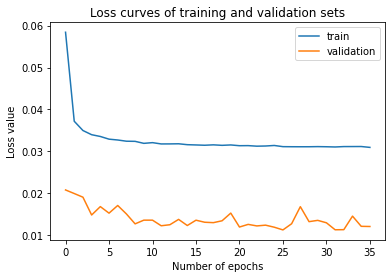

In [ ]:
plt.plot(Best_LSTM_history.history['loss'], label='train')
plt.plot(Best_LSTM_history.history['val_loss'], label='validation')
plt.legend()
plt.title('Loss curves of training and validation sets')
plt.xlabel('Number of epochs')
plt.ylabel('Loss value')
plt.show()

Evaluating time taken for training by the best model.

In [ ]:
LSTM_training_time = LSTM_end_time - LSTM_start_time
LSTM_training_time

293.7571403980255

In [ ]:
y_pred_lstm = Best_LSTM_model.predict(X_test)

In [ ]:
y_pred_lstm_inv = prediction_invertor(y_pred_lstm)

In [ ]:
rmse_lstm = metrics.mean_squared_error(y_test_inv, y_pred_lstm_inv, squared=False)
print('Test RMSE: %.3f' % rmse_lstm)

Test RMSE: 24.491


Evaluating the best model in terms of Mean Absolute Error.

In [ ]:
mae_br = metrics.mean_absolute_error(y_test_inv, y_pred_lstm_inv)
print('Test MAE: %.3f' % mae_br)

Test MAE: 15.149


Evaluating the best model in terms of R2 (R square) score.

In [ ]:
r2_br = metrics.r2_score(y_test_inv, y_pred_lstm_inv)
print('Test R2: %.3f' % r2_br)

Test R2: 0.931


Creating metric object of permetric library that would produce different evaluation metrics.

In [ ]:
evaluator0 = RegressionMetric(y_test_inv, y_pred_lstm_inv, decimal=3)

Evaluating the best model in terms of Nash-Sutcliffe Efficiency Coefficient.

In [ ]:
print('Test NSE: %.3f' % evaluator0.NSE())

Test NSE: 0.929


Evaluating the best model in terms of Coefficient of Determination.

In [ ]:
print('Test CC: %.3f' % evaluator0.coefficient_of_determination())

Test CC: 0.931


*Coding reference for above executions:*

https://scikit-learn.org/stable/modules/model_evaluation.html

https://pypi.org/project/permetrics/

Saving best model in the TensorFlow SavedModel format that saves model architecture, weights, optimizer and losses of the trained best model, to enable transfer learning.

In [ ]:
# tf.keras.models.save_model(Best_LSTM_model, os.path.join(DATA_PATH,'Saved_Models/LSTM'))

*Coding reference for above executions:*

https://www.tensorflow.org/guide/keras/save_and_serialize

Creating list of other cities in the study, the data of which will be used to train and test the best model, with transfer learning as well as without transfer learning.

In [ ]:
other_cities_list = ['Bengaluru', 'Hyderabad', 'Jaipur', 'Mumbai']

Load data preprocessed data set of air pollution and meteorological data for other cities into a pandas dataframes.

In [ ]:
for city in other_cities_list:
  globals()[f"{city}_air_met_df"] = pd.read_csv(os.path.join(DATA_PATH,'{}_air_met_df.csv'.format(city)))

Randomly checking if the datarames are created.

In [ ]:
Hyderabad_air_met_df.head()

,Unnamed: 0,Datetime,sunHour,uvIndex.1,DewPointC,HeatIndexC,cloudcover,humidity,precipMM,pressure,...,windspeedKmph,CO,NH3,NO,NO2,NOx,O3,PM10,PM2.5,SO2
0,0,2015-01-04 14:00:00,8.7,7,15,27,40,48,0.0,1013,...,13,0.24,39.02,6.10,6.34,12.44,38.17,178.41,114.18,2.96
1,1,2015-01-04 15:00:00,8.7,7,15,26,45,50,0.0,1013,...,14,0.19,36.95,2.97,5.99,8.96,38.36,191.44,122.52,1.88
2,2,2015-01-04 16:00:00,8.7,6,15,26,43,53,0.0,1013,...,14,0.17,31.50,3.26,6.27,9.53,37.33,193.73,123.99,1.90
3,3,2015-01-04 17:00:00,8.7,6,15,25,41,57,0.0,1014,...,13,0.17,44.71,3.13,6.81,9.94,38.07,191.90,122.82,1.84
4,4,2015-01-04 18:00:00,8.7,6,15,25,38,60,0.0,1015,...,13,0.25,315.00,3.14,12.47,15.61,37.38,212.79,136.19,1.61


Loading best model in the TensorFlow SavedModel format that saves model architecture, weights, optimizer and losses of the trained best model, to enable transfer learning.

In [ ]:
Best_LSTM_model_saved = tf.keras.models.load_model(os.path.join(DATA_PATH,'Saved_Models/LSTM'))

*Coding reference for above executions:*

https://www.tensorflow.org/guide/keras/save_and_serialize

Defining a function that woudl do all the time series data preparation, training (excluding hyperparmeter tuning), testing and evaluation of best model for other cities, all in one go.

In [ ]:
def model_run(df, time_lags, saved_model, city_name):
  print('The Best model is now being checked for {} city...'.format(city_name))
  df.drop(columns=['Unnamed: 0', 'Datetime'], inplace=True)

  tr_size = int(len(df) * 0.8)
  te_size = len(df) - tr_size
  tr_df, te_df = df.iloc[0:tr_size], df.iloc[tr_size:len(df)]

  scaler_func = MinMaxScaler(feature_range=(0,1))
  tr_df = pd.DataFrame(scaler_func.fit_transform(tr_df), columns=tr_df.columns)
  te_df = pd.DataFrame(scaler_func.transform(te_df), columns=te_df.columns)

  X_tr, y_tr = create_dataset(tr_df, tr_df['PM2.5'], time_lags)
  X_te, y_te = create_dataset(te_df, te_df['PM2.5'], time_lags)

  start_time = time.time()
  history = saved_model.fit(X_tr, y_tr, epochs=100, batch_size=128, validation_split=0.125, callbacks=[early_stopping_monitor])
  end_time = time.time()

  training_time = end_time - start_time
  print('Time taken for training the model is {} seconds.'.format(training_time))

  y_predicted = saved_model.predict(X_te)
  y_predicted_inverse = np.concatenate((te_df.values[:-24,:-1], y_predicted), axis=1)
  y_predicted_inverse = scaler_func.inverse_transform(y_predicted_inverse)[:,-1]

  y_te_reshaped = y_te.reshape(-1,1)
  y_te_inverse = np.concatenate((te_df.values[:-24,:-1], y_te_reshaped), axis=1)
  y_te_inverse = scaler_func.inverse_transform(y_te_inverse)[:,-1]

  print('The evaluation metrics for {} city are as follows:'.format(city_name))
  rmse_func = metrics.mean_squared_error(y_te_inverse, y_predicted_inverse, squared=False)
  print('Test RMSE: %.3f' % rmse_func)

  mae_func = metrics.mean_absolute_error(y_te_inverse, y_predicted_inverse)
  print('Test MAE: %.3f' % mae_func)

  r2_func = metrics.r2_score(y_te_inverse, y_predicted_inverse)
  print('Test R2: %.3f' % r2_func)

  evaluator_func = RegressionMetric(y_te_inverse, y_predicted_inverse, decimal=3)
  print('Test NSE: %.3f' % evaluator_func.NSE())
  print('Test CC: %.3f' % evaluator_func.coefficient_of_determination())

  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='validation')
  plt.legend()
  plt.title('Loss curves of training and validation sets')
  plt.xlabel('Number of epochs')
  plt.ylabel('Loss value')
  plt.show()

Training, testing and evaluation of saved best model with transfer learning for different city.

The Best model is now being checked for Bengaluru city...
Epoch 1/100
240/240 [==============================] - 10s 24ms/step - loss: 0.0349 - val_loss: 0.0177
Epoch 2/100
240/240 [==============================] - 5s 22ms/step - loss: 0.0320 - val_loss: 0.0185
Epoch 3/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0314 - val_loss: 0.0171
Epoch 4/100
240/240 [==============================] - 5s 22ms/step - loss: 0.0309 - val_loss: 0.0163
Epoch 5/100
240/240 [==============================] - 5s 22ms/step - loss: 0.0310 - val_loss: 0.0155
Epoch 6/100
240/240 [==============================] - 7s 29ms/step - loss: 0.0308 - val_loss: 0.0153
Epoch 7/100
240/240 [==============================] - 5s 22ms/step - loss: 0.0308 - val_loss: 0.0155
Epoch 8/100
240/240 [==============================] - 5s 22ms/step - loss: 0.0307 - val_loss: 0.0153
Epoch 9/100
240/240 [==============================] - 6s 27ms/step - loss: 0.0307 - val_loss: 0.0162
Epoch 10/100
240/240 [=

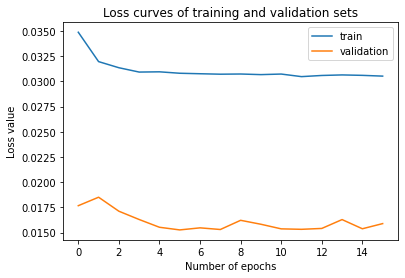

In [ ]:
model_run(Bengaluru_air_met_df,24,Best_LSTM_model_saved,'Bengaluru')

Training, testing and evaluation of best model without transfer learning for same city as above.

**NOTE:** Before executing the below two lines, the code that loads dataframes for other cities has to be rerun to avoid any errors.

In [ ]:
BLR_LSTM_model = keras.Sequential()
BLR_LSTM_model.add(layers.LSTM(70, input_shape=(24, 21)))
BLR_LSTM_model.add(layers.Dropout(0.4))
BLR_LSTM_model.add(layers.Dense(1))
BLR_LSTM_model.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=tfa.optimizers.AdamW(weight_decay=0.0001, learning_rate=0.001))

The Best model is now being checked for Bengaluru city...
Epoch 1/100
240/240 [==============================] - 7s 24ms/step - loss: 0.0550 - val_loss: 0.0206
Epoch 2/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0348 - val_loss: 0.0179
Epoch 3/100
240/240 [==============================] - 7s 27ms/step - loss: 0.0332 - val_loss: 0.0165
Epoch 4/100
240/240 [==============================] - 5s 22ms/step - loss: 0.0324 - val_loss: 0.0169
Epoch 5/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0320 - val_loss: 0.0178
Epoch 6/100
240/240 [==============================] - 6s 27ms/step - loss: 0.0317 - val_loss: 0.0156
Epoch 7/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0315 - val_loss: 0.0155
Epoch 8/100
240/240 [==============================] - 5s 22ms/step - loss: 0.0313 - val_loss: 0.0158
Epoch 9/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0313 - val_loss: 0.0161
Epoch 10/100
240/240 [==

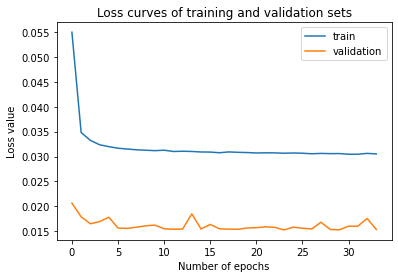

In [ ]:
model_run(Bengaluru_air_met_df,24,BLR_LSTM_model,'Bengaluru')

Training, testing and evaluation of saved best model with transfer learning for different city.

The Best model is now being checked for Hyderabad city...
Epoch 1/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0261 - val_loss: 0.0132
Epoch 2/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0258 - val_loss: 0.0070
Epoch 3/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0254 - val_loss: 0.0090
Epoch 4/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0255 - val_loss: 0.0080
Epoch 5/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0254 - val_loss: 0.0074
Epoch 6/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0253 - val_loss: 0.0082
Epoch 7/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0254 - val_loss: 0.0067
Epoch 8/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0252 - val_loss: 0.0067
Epoch 9/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0253 - val_loss: 0.0106
Epoch 10/100
240/240 [==

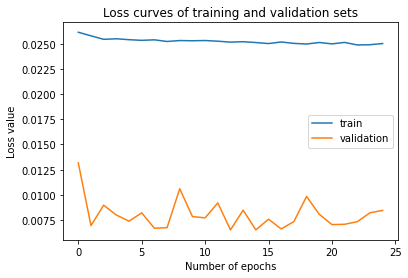

In [ ]:
model_run(Hyderabad_air_met_df,24,Best_LSTM_model_saved,'Hyderabad')

Training, testing and evaluation of best model without transfer learning for same city as above.

**NOTE:** Before executing the below two lines, the code that loads dataframes for other cities has to be rerun to avoid any errors.

In [ ]:
HYD_LSTM_model = keras.Sequential()
HYD_LSTM_model.add(layers.LSTM(70, input_shape=(24, 21)))
HYD_LSTM_model.add(layers.Dropout(0.4))
HYD_LSTM_model.add(layers.Dense(1))
HYD_LSTM_model.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=tfa.optimizers.AdamW(weight_decay=0.0001, learning_rate=0.001))

The Best model is now being checked for Hyderabad city...
Epoch 1/100
240/240 [==============================] - 7s 24ms/step - loss: 0.0562 - val_loss: 0.0156
Epoch 2/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0318 - val_loss: 0.0100
Epoch 3/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0295 - val_loss: 0.0156
Epoch 4/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0283 - val_loss: 0.0122
Epoch 5/100
240/240 [==============================] - 5s 22ms/step - loss: 0.0277 - val_loss: 0.0077
Epoch 6/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0272 - val_loss: 0.0081
Epoch 7/100
240/240 [==============================] - 5s 22ms/step - loss: 0.0270 - val_loss: 0.0074
Epoch 8/100
240/240 [==============================] - 5s 22ms/step - loss: 0.0269 - val_loss: 0.0076
Epoch 9/100
240/240 [==============================] - 5s 22ms/step - loss: 0.0265 - val_loss: 0.0074
Epoch 10/100
240/240 [==

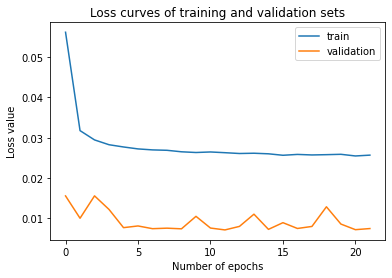

In [ ]:
model_run(Hyderabad_air_met_df,24,HYD_LSTM_model,'Hyderabad')

Training, testing and evaluation of saved best model with transfer learning for different city.

The Best model is now being checked for Jaipur city...
Epoch 1/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0196 - val_loss: 0.0099
Epoch 2/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0186 - val_loss: 0.0094
Epoch 3/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0185 - val_loss: 0.0100
Epoch 4/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0183 - val_loss: 0.0096
Epoch 5/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0180 - val_loss: 0.0091
Epoch 6/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0180 - val_loss: 0.0095
Epoch 7/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0179 - val_loss: 0.0093
Epoch 8/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0179 - val_loss: 0.0091
Epoch 9/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0179 - val_loss: 0.0091
Epoch 10/100
122/122 [=====

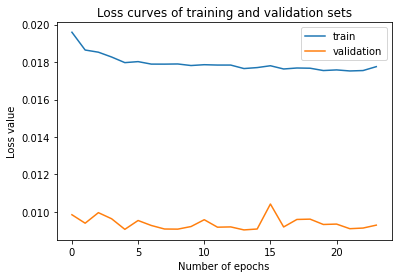

In [ ]:
model_run(Jaipur_air_met_df,24,Best_LSTM_model_saved,'Jaipur')

Training, testing and evaluation of best model without transfer learning for same city as above.

**NOTE:** Before executing the below two lines, the code that loads dataframes for other cities has to be rerun to avoid any errors.

In [ ]:
JPR_LSTM_model = keras.Sequential()
JPR_LSTM_model.add(layers.LSTM(70, input_shape=(24, 21)))
JPR_LSTM_model.add(layers.Dropout(0.4))
JPR_LSTM_model.add(layers.Dense(1))
JPR_LSTM_model.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=tfa.optimizers.AdamW(weight_decay=0.0001, learning_rate=0.001))

The Best model is now being checked for Jaipur city...
Epoch 1/100
122/122 [==============================] - 5s 26ms/step - loss: 0.0646 - val_loss: 0.0157
Epoch 2/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0325 - val_loss: 0.0138
Epoch 3/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0273 - val_loss: 0.0127
Epoch 4/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0252 - val_loss: 0.0117
Epoch 5/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0233 - val_loss: 0.0119
Epoch 6/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0223 - val_loss: 0.0110
Epoch 7/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0215 - val_loss: 0.0107
Epoch 8/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0209 - val_loss: 0.0104
Epoch 9/100
122/122 [==============================] - 3s 23ms/step - loss: 0.0205 - val_loss: 0.0099
Epoch 10/100
122/122 [=====

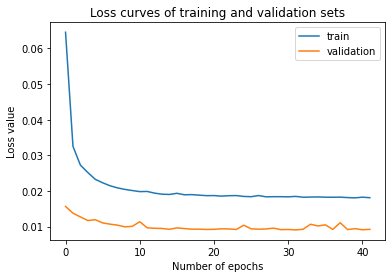

In [ ]:
model_run(Jaipur_air_met_df,24,JPR_LSTM_model,'Jaipur')

Training, testing and evaluation of saved best model with transfer learning for different city.

The Best model is now being checked for Mumbai city...
Epoch 1/100
240/240 [==============================] - 6s 23ms/step - loss: 0.0506 - val_loss: 0.0144
Epoch 2/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0502 - val_loss: 0.0150
Epoch 3/100
240/240 [==============================] - 5s 22ms/step - loss: 0.0499 - val_loss: 0.0149
Epoch 4/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0498 - val_loss: 0.0149
Epoch 5/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0499 - val_loss: 0.0171
Epoch 6/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0498 - val_loss: 0.0164
Epoch 7/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0498 - val_loss: 0.0159
Epoch 8/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0497 - val_loss: 0.0151
Epoch 9/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0498 - val_loss: 0.0160
Epoch 10/100
240/240 [=====

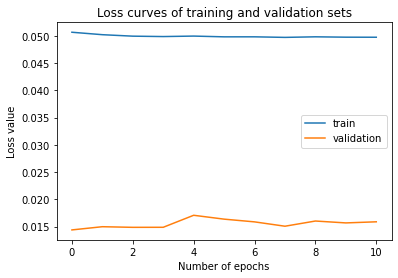

In [ ]:
model_run(Mumbai_air_met_df,24,Best_LSTM_model_saved,'Mumbai')

Training, testing and evaluation of best model without transfer learning for same city as above.

**NOTE:** Before executing the below two lines, the code that loads dataframes for other cities has to be rerun to avoid any errors.

In [ ]:
BOM_LSTM_model = keras.Sequential()
BOM_LSTM_model.add(layers.LSTM(70, input_shape=(24, 21)))
BOM_LSTM_model.add(layers.Dropout(0.4))
BOM_LSTM_model.add(layers.Dense(1))
BOM_LSTM_model.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=tfa.optimizers.AdamW(weight_decay=0.0001, learning_rate=0.001))

The Best model is now being checked for Mumbai city...
Epoch 1/100
240/240 [==============================] - 7s 24ms/step - loss: 0.0741 - val_loss: 0.0216
Epoch 2/100
240/240 [==============================] - 6s 23ms/step - loss: 0.0537 - val_loss: 0.0216
Epoch 3/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0523 - val_loss: 0.0255
Epoch 4/100
240/240 [==============================] - 5s 22ms/step - loss: 0.0517 - val_loss: 0.0167
Epoch 5/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0514 - val_loss: 0.0179
Epoch 6/100
240/240 [==============================] - 5s 22ms/step - loss: 0.0510 - val_loss: 0.0159
Epoch 7/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0509 - val_loss: 0.0170
Epoch 8/100
240/240 [==============================] - 5s 22ms/step - loss: 0.0508 - val_loss: 0.0153
Epoch 9/100
240/240 [==============================] - 5s 23ms/step - loss: 0.0507 - val_loss: 0.0171
Epoch 10/100
240/240 [=====

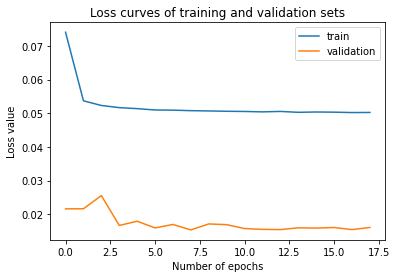

In [ ]:
model_run(Mumbai_air_met_df,24,BOM_LSTM_model,'Mumbai')